<a class="anchor" id="0"></a>
# **Logistic Regression Classifier Tutorial with Python** 

# **1. Introduction to Logistic Regression** <a class="anchor" id="1"></a>




When data scientists may come across a new classification problem, the first algorithm that may come across their mind is **Logistic Regression**. It is a supervised learning classification algorithm which is used to predict observations to a discrete set of classes. Practically, it is used to classify observations into different categories. Hence, its output is discrete in nature. **Logistic Regression** is also called **Logit Regression**. It is one of the most simple, straightforward and versatile classification algorithms which is used to solve classification problems.

# **2. Logistic Regression intuition** <a class="anchor" id="2"></a>



In statistics, the **Logistic Regression model** is a widely used statistical model which is primarily used for classification purposes. It means that given a set of observations, Logistic Regression algorithm helps us to classify these observations into two or more discrete classes. So, the target variable is discrete in nature.


The Logistic Regression algorithm works as follows -

## **Implement linear equation**


Logistic Regression algorithm works by implementing a linear equation with independent or explanatory variables to predict a response value. For example, we consider the example of number of hours studied and probability of passing the exam. Here, number of hours studied is the explanatory variable and it is denoted by x1. Probability of passing the exam is the response or target variable and it is denoted by z.


If we have one explanatory variable (x1) and one response variable (z), then the linear equation would be given mathematically with the following equation-

    z = β0 + β1x1    

Here, the coefficients β0 and β1 are the parameters of the model.


If there are multiple explanatory variables, then the above equation can be extended to

    z = β0 + β1x1+ β2x2+……..+ βnxn
    
Here, the coefficients β0, β1, β2 and βn are the parameters of the model.

So, the predicted response value is given by the above equations and is denoted by z.

## **Sigmoid Function**

This predicted response value, denoted by z is then converted into a probability value that lie between 0 and 1. We use the sigmoid function in order to map predicted values to probability values. This sigmoid function then maps any real value into a probability value between 0 and 1.

In machine learning, sigmoid function is used to map predictions to probabilities. The sigmoid function has an S shaped curve. It is also called sigmoid curve.

A Sigmoid function is a special case of the Logistic function. It is given by the following mathematical formula.

Graphically, we can represent sigmoid function with the following graph.

### Sigmoid Function

![Sigmoid Function](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)

## **Decision boundary**

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0 

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-

![Decision boundary in sigmoid function](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png)

## **Making predictions**

Now, we know about sigmoid function and decision boundary in logistic regression. We can use our knowledge of sigmoid function and decision boundary to write a prediction function. A prediction function in logistic regression returns the probability of the observation being positive, Yes or True. We call this as class 1 and it is denoted by P(class = 1). If the probability inches closer to one, then we will be more confident about our model that the observation is in class 1, otherwise it is in class 0.


# **3. Assumptions of Logistic Regression** <a class="anchor" id="3"></a>



The Logistic Regression model requires several key assumptions. These are as follows:-

1. Logistic Regression model requires the dependent variable to be binary, multinomial or ordinal in nature.

2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

4. Logistic Regression model assumes linearity of independent variables and log odds.

5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

# **4. Types of Logistic Regression** <a class="anchor" id="4"></a>


[Table of Contents](#0.1)


Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

### 1. Binary Logistic Regression

In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.


### 2. Multinomial Logistic Regression

In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.


### 3. Ordinal Logistic Regression

In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.


# **5. Import libraries** <a class="anchor" id="5"></a>



In [177]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [362]:
import warnings

warnings.filterwarnings('ignore')

# **6. Import dataset** <a class="anchor" id="6"></a>




In [363]:
data = './data/weatherAUS.csv'

df = pd.read_csv(data)

# **7. Exploratory data analysis** <a class="anchor" id="7"></a>




Now, We will explore the data to gain insights about the data. 

### print shape of the dataset

In [180]:
df.shape

(142193, 24)

### preview the dataset

In [181]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


### print column names

In [182]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

### Drop  RISK_MM variable


In [183]:
df = df.drop(columns=['RISK_MM'])

### view summary of dataset

In [184]:
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

### Types of variables


In this section, segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type float64.


In [185]:
# find categorical variables
categorical = df.select_dtypes(include=['object']).columns

# Displaying the list of categorical variables
print("Categorical Variables:")
print(categorical)


Categorical Variables:
Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')


In [186]:
# view the categorical variables

df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### Missing values in categorical variables

In [187]:
# check missing values in categorical variables
missing_values = df[categorical].isnull().sum()

# Displaying the number of missing values for each categorical variable
print("Missing values in categorical variables:")
print(missing_values)


Missing values in categorical variables:
Date                0
Location            0
WindGustDir      9330
WindDir9am      10013
WindDir3pm       3778
RainToday        1406
RainTomorrow        0
dtype: int64


In [188]:
# print categorical variables containing missing values
missing_categorical_vars = missing_values[missing_values > 0]

# Displaying the categorical variables that contain missing values
print("Categorical variables containing missing values:")
print(missing_categorical_vars)

Categorical variables containing missing values:
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


### Frequency counts of categorical variables

In [189]:
# view frequency of categorical variables
for var in categorical:
    print(f"Frequency of '{var}':")
    print(df[var].value_counts())
    print()

Frequency of 'Date':
2013-12-01    49
2014-01-09    49
2014-01-11    49
2014-01-12    49
2014-01-13    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: Date, Length: 3436, dtype: int64

Frequency of 'Location':
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
Wa

In [190]:
# view frequency distribution of categorical variables
# for var in categorical:
#     plt.figure(figsize=(10, 5))
#     df[var].value_counts().plot(kind='bar')
#     plt.title(f'Frequency Distribution of {var}')
#     plt.xlabel(var)
#     plt.ylabel('Frequency')
#     plt.xticks(rotation=45)  
#     plt.show()

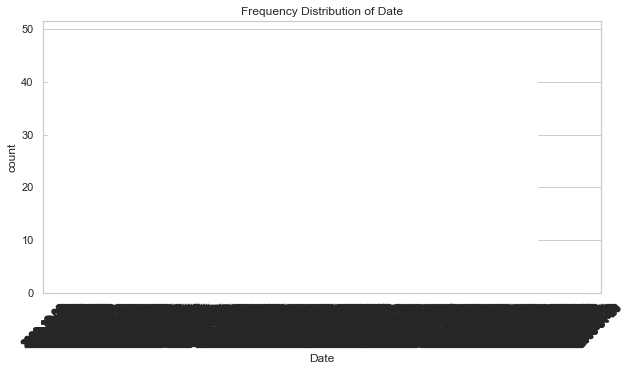

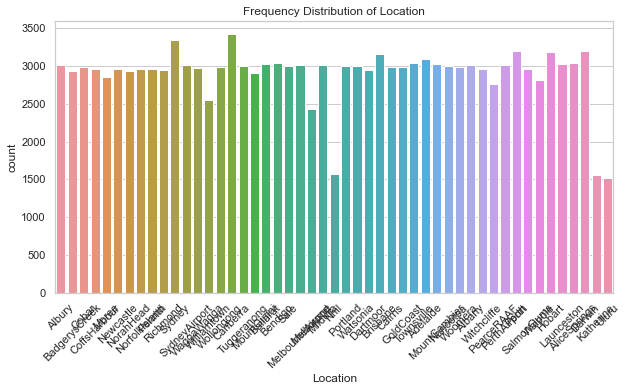

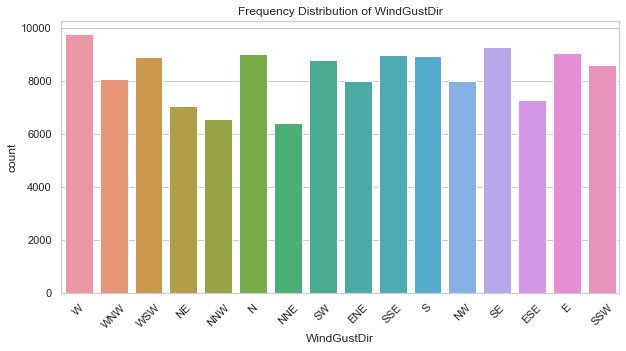

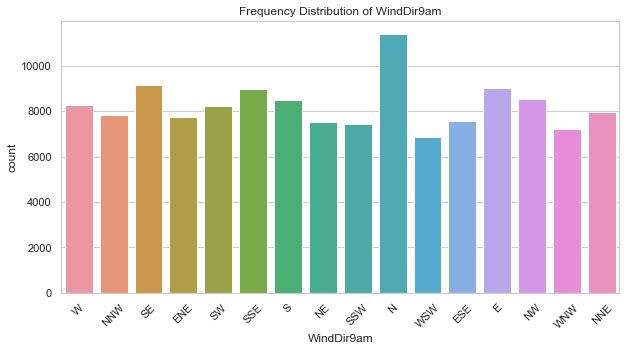

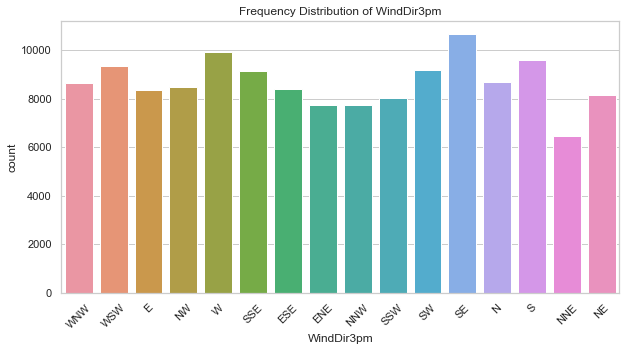

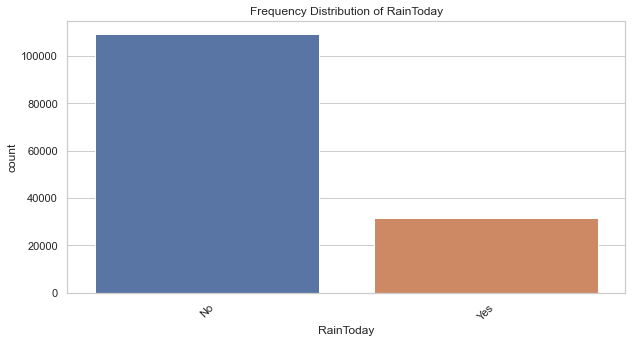

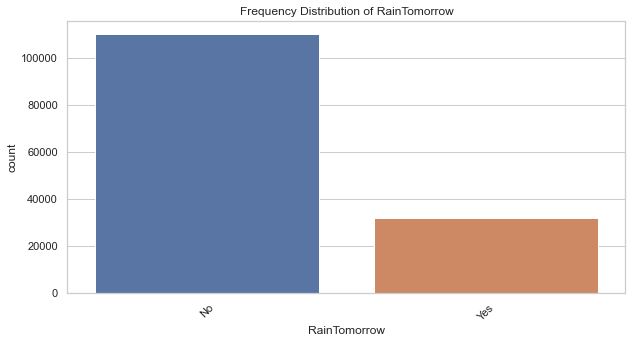

In [191]:
for var in categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=var)
    plt.title(f'Frequency Distribution of {var}')
    plt.xticks(rotation=45)  
    plt.show()

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model.

In [192]:
# check for cardinality in categorical variables
cardinality = df[categorical].nunique()

print("Cardinality of Categorical Variables:")
print(cardinality)

Cardinality of Categorical Variables:
Date            3436
Location          49
WindGustDir       16
WindDir9am        16
WindDir3pm        16
RainToday          2
RainTomorrow       2
dtype: int64


### Here explain which variables need to be processed based on the above result? why?

### Feature Engineering of Date Variable

In [193]:
df['Date'].dtypes

dtype('O')

In [194]:
# parse the dates, currently coded as strings, into datetime format
date_columns = ['Date']

for col in date_columns:
    df[col] = pd.to_datetime(df[col])

print(df[date_columns].head())

        Date
0 2008-12-01
1 2008-12-02
2 2008-12-03
3 2008-12-04
4 2008-12-05


In [195]:
# extract year from date
for col in date_columns:
    df[f'{col}_year'] = df[col].dt.year

# Previewing the DataFrame to see the extracted years
print(df[[f'{col}_year' for col in date_columns]].head())



   Date_year
0       2008
1       2008
2       2008
3       2008
4       2008


In [196]:
# extract month from date
for col in date_columns:
    df[f'{col}_month'] = df[col].dt.month

print(df[[f'{col}_month' for col in date_columns]].head())

   Date_month
0          12
1          12
2          12
3          12
4          12


In [197]:
# extract day from date
for col in date_columns:
    df[f'{col}_day'] = df[col].dt.day

print(df[[f'{col}_day' for col in date_columns]].head())

   Date_day
0         1
1         2
2         3
3         4
4         5


In [198]:
# again view the summary of dataset
df.info()
# df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           142193 non-null  datetime64[ns]
 1   Location       142193 non-null  object        
 2   MinTemp        141556 non-null  float64       
 3   MaxTemp        141871 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   Evaporation    81350 non-null   float64       
 6   Sunshine       74377 non-null   float64       
 7   WindGustDir    132863 non-null  object        
 8   WindGustSpeed  132923 non-null  float64       
 9   WindDir9am     132180 non-null  object        
 10  WindDir3pm     138415 non-null  object        
 11  WindSpeed9am   140845 non-null  float64       
 12  WindSpeed3pm   139563 non-null  float64       
 13  Humidity9am    140419 non-null  float64       
 14  Humidity3pm    138583 non-null  float64       
 15  

In [199]:
# drop the original Date variable
df = df.drop(columns=['Date'])

print(df.head())


  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Pressure3pm  Cloud9am  Cloud3pm  \
0           44.0          W        WNW  ...       1007.1       8.0       NaN   
1           44.0        NNW        WSW  ...       1007.8       NaN       NaN   
2           46.0          W        WSW  ...       1008.7       NaN       2.0   
3           24.0         SE          E  ...       1012.8       NaN       NaN   
4           41.0        ENE         NW  ...       1006.0       7.0       8.0   

   Temp9am  Temp3pm  RainToday  RainTomorrow  Date_year 

In [200]:
# preview the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 25 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

### Explore Categorical Variables

In [201]:
# find categorical variables
categorical_vars = df.select_dtypes(include=['object']).columns

print("Categorical Variables:")
print(categorical_vars)

Categorical Variables:
Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday',
       'RainTomorrow'],
      dtype='object')


In [202]:
# check for missing values in categorical variables
missing_values = df[categorical_vars].isnull().sum()

print("Missing values in categorical variables:")
print(missing_values[missing_values > 0])

Missing values in categorical variables:
WindGustDir     9330
WindDir9am     10013
WindDir3pm      3778
RainToday       1406
dtype: int64


### Explore `Location` variable

In [203]:
# print number of labels in Location variable
num_labels = df['Location'].nunique()

print(f"Number of unique labels in 'Location': {num_labels}")

Number of unique labels in 'Location': 49


In [204]:
# check labels in location variable
unique_labels = df['Location'].unique()

print("Unique labels in 'Location':")
print(unique_labels)

Unique labels in 'Location':
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


In [205]:
# check frequency distribution of values in Location variable
location_counts = df['Location'].value_counts()

print("Frequency distribution of values in 'Location':")
print(location_counts)

Frequency distribution of values in 'Location':
Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Launceston          3028
Ballarat            3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
No

In [206]:
# let's do One Hot Encoding of Location variable
# get k-1 dummy variables after One Hot Encoding
# preview the dataset with head() method
df_encoded = pd.get_dummies(df, columns=['Location'], drop_first=True)

print("DataFrame after One Hot Encoding:")
print(df_encoded.head())

DataFrame after One Hot Encoding:
   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0     13.4     22.9       0.6          NaN       NaN           W   
1      7.4     25.1       0.0          NaN       NaN         WNW   
2     12.9     25.7       0.0          NaN       NaN         WSW   
3      9.2     28.0       0.0          NaN       NaN          NE   
4     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  ...  \
0           44.0          W        WNW          20.0  ...   
1           44.0        NNW        WSW           4.0  ...   
2           46.0          W        WSW          19.0  ...   
3           24.0         SE          E          11.0  ...   
4           41.0        ENE         NW           7.0  ...   

   Location_Townsville  Location_Tuggeranong  Location_Uluru  \
0                    0                     0               0   
1                    0                     0               0  

### Explore `WindGustDir` variable

In [207]:
# print number of labels in WindGustDir variable
num_labels_wind_gust_dir = df['WindGustDir'].nunique()

print(f"Number of unique labels in 'WindGustDir': {num_labels_wind_gust_dir}")

Number of unique labels in 'WindGustDir': 16


In [208]:
# check labels in WindGustDir variable
unique_labels_wind_gust_dir = df['WindGustDir'].unique()

print("Unique labels in 'WindGustDir':")
print(unique_labels_wind_gust_dir)

Unique labels in 'WindGustDir':
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']


In [209]:
# check frequency distribution of values in WindGustDir variable
wind_gust_dir_counts = df['WindGustDir'].value_counts()

print("Frequency distribution of values in 'WindGustDir':")
print(wind_gust_dir_counts)

Frequency distribution of values in 'WindGustDir':
W      9780
SE     9309
E      9071
N      9033
SSE    8993
S      8949
WSW    8901
SW     8797
SSW    8610
WNW    8066
NW     8003
ENE    7992
ESE    7305
NE     7060
NNW    6561
NNE    6433
Name: WindGustDir, dtype: int64


In [210]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method
df['WindGustDir_Missing'] = df['WindGustDir'].isnull().astype(int)

wind_gust_dir_encoded = pd.get_dummies(df['WindGustDir'], drop_first=True, prefix='WindGustDir')

df_encoded = pd.concat([df, wind_gust_dir_encoded], axis=1)

print("DataFrame after One Hot Encoding of 'WindGustDir':")
print(df_encoded.head())

DataFrame after One Hot Encoding of 'WindGustDir':
  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  WindGustDir_NNW  WindGustDir_NW  \
0           44.0          W        WNW  ...                0               0   
1           44.0        NNW        WSW  ...                0               0   
2           46.0          W        WSW  ...                0               0   
3           24.0         SE          E  ...                0               0   
4           41.0        ENE         NW  ...                0               0   

   Wi

In [211]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category
count_of_observations = df_encoded.sum()

print("Count of observations for each category (boolean variables):")
print(count_of_observations)

Count of observations for each category (boolean variables):
Location               AlburyAlburyAlburyAlburyAlburyAlburyAlburyAlbu...
MinTemp                                                        1725058.0
MaxTemp                                                        3295207.1
Rainfall                                                        330845.8
Evaporation                                                     444970.2
Sunshine                                                        567113.7
WindGustSpeed                                                  5314832.0
WindSpeed9am                                                   1972110.0
WindSpeed3pm                                                   2601116.0
Humidity9am                                                    9666979.0
Humidity3pm                                                    7134614.0
Pressure9am                                                  130441841.1
Pressure3pm                                                1301

### Explore `WindDir9am` variable

In [212]:
# print number of labels in WindDir9am variable
num_labels_wind_dir_9am = df['WindDir9am'].nunique()

print(f"Number of unique labels in 'WindDir9am': {num_labels_wind_dir_9am}")

Number of unique labels in 'WindDir9am': 16


In [213]:
# check labels in WindDir9am variable
unique_labels_wind_dir_9am = df['WindDir9am'].unique()

print("Unique labels in 'WindDir9am':")
print(unique_labels_wind_dir_9am)

Unique labels in 'WindDir9am':
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']


In [214]:
# check frequency distribution of values in WindDir9am variable
wind_dir_9am_counts = df['WindDir9am'].value_counts()

print("Frequency distribution of values in 'WindDir9am':")
print(wind_dir_9am_counts)


Frequency distribution of values in 'WindDir9am':
N      11393
SE      9162
E       9024
SSE     8966
NW      8552
S       8493
W       8260
SW      8237
NNE     7948
NNW     7840
ENE     7735
ESE     7558
NE      7527
SSW     7448
WNW     7194
WSW     6843
Name: WindDir9am, dtype: int64


In [215]:
# let's do One Hot Encoding of WindDir9am variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method
df['WindDir9am_Missing'] = df['WindDir9am'].isnull().astype(int)

wind_dir_9am_encoded = pd.get_dummies(df['WindDir9am'], drop_first=True, prefix='WindDir9am')

df_encoded = pd.concat([df, wind_dir_9am_encoded], axis=1)

print("DataFrame after One Hot Encoding of 'WindDir9am':")
print(df_encoded.head())

DataFrame after One Hot Encoding of 'WindDir9am':
  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  WindDir9am_NNW  WindDir9am_NW  \
0           44.0          W        WNW  ...               0              0   
1           44.0        NNW        WSW  ...               1              0   
2           46.0          W        WSW  ...               0              0   
3           24.0         SE          E  ...               0              0   
4           41.0        ENE         NW  ...               0              0   

   WindDir9am_S  W

In [216]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category
category_counts = df_encoded.sum()

print("Count of observations for each category (boolean variables):")
print(category_counts)

Count of observations for each category (boolean variables):
Location               AlburyAlburyAlburyAlburyAlburyAlburyAlburyAlbu...
MinTemp                                                        1725058.0
MaxTemp                                                        3295207.1
Rainfall                                                        330845.8
Evaporation                                                     444970.2
Sunshine                                                        567113.7
WindGustSpeed                                                  5314832.0
WindSpeed9am                                                   1972110.0
WindSpeed3pm                                                   2601116.0
Humidity9am                                                    9666979.0
Humidity3pm                                                    7134614.0
Pressure9am                                                  130441841.1
Pressure3pm                                                1301

### Explore `WindDir3pm` variable

In [217]:
# print number of labels in WindDir3pm variable
num_labels_wind_dir_3pm = df['WindDir3pm'].nunique()

print(f"Number of unique labels in 'WindDir3pm': {num_labels_wind_dir_3pm}")

Number of unique labels in 'WindDir3pm': 16


In [218]:
# check labels in WindDir3pm variable
unique_labels_wind_dir_3pm = df['WindDir3pm'].unique()

print("Unique labels in 'WindDir3pm':")
print(unique_labels_wind_dir_3pm)

Unique labels in 'WindDir3pm':
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']


In [219]:
# check frequency distribution of values in WindDir3pm variable
wind_dir_3pm_counts = df['WindDir3pm'].value_counts()

print("Frequency distribution of values in 'WindDir3pm':")
print(wind_dir_3pm_counts)

Frequency distribution of values in 'WindDir3pm':
SE     10663
W       9911
S       9598
WSW     9329
SW      9182
SSE     9142
N       8667
WNW     8656
NW      8468
ESE     8382
E       8342
NE      8164
SSW     8010
NNW     7733
ENE     7724
NNE     6444
Name: WindDir3pm, dtype: int64


In [220]:
# let's do One Hot Encoding of WindDir3pm variable
# get k-1 dummy variables after One Hot Encoding
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method
df['WindDir3pm_Missing'] = df['WindDir3pm'].isnull().astype(int)

wind_dir_3pm_encoded = pd.get_dummies(df['WindDir3pm'], drop_first=True, prefix='WindDir3pm')

df_encoded = pd.concat([df, wind_dir_3pm_encoded], axis=1)

print("DataFrame after One Hot Encoding of 'WindDir3pm':")
print(df_encoded.head())

DataFrame after One Hot Encoding of 'WindDir3pm':
  Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  WindDir3pm_NNW  WindDir3pm_NW  \
0           44.0          W        WNW  ...               0              0   
1           44.0        NNW        WSW  ...               0              0   
2           46.0          W        WSW  ...               0              0   
3           24.0         SE          E  ...               0              0   
4           41.0        ENE         NW  ...               0              1   

   WindDir3pm_S  W

In [221]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category
category_counts = df_encoded.sum()

print("Count of observations for each category (boolean variables):")
print(category_counts)

Count of observations for each category (boolean variables):
Location               AlburyAlburyAlburyAlburyAlburyAlburyAlburyAlbu...
MinTemp                                                        1725058.0
MaxTemp                                                        3295207.1
Rainfall                                                        330845.8
Evaporation                                                     444970.2
Sunshine                                                        567113.7
WindGustSpeed                                                  5314832.0
WindSpeed9am                                                   1972110.0
WindSpeed3pm                                                   2601116.0
Humidity9am                                                    9666979.0
Humidity3pm                                                    7134614.0
Pressure9am                                                  130441841.1
Pressure3pm                                                1301

### Explore `RainToday` variable

In [222]:
# print number of labels in RainToday variable
num_labels_rain_today = df['RainToday'].nunique()

print(f"Number of unique labels in 'RainToday': {num_labels_rain_today}")

Number of unique labels in 'RainToday': 2


In [223]:
# check labels in WindGustDir variable
unique_labels_rain_today = df['RainToday'].unique()

print("Unique labels in 'RainToday':")
print(unique_labels_rain_today)

Unique labels in 'RainToday':
['No' 'Yes' nan]


In [224]:
# check frequency distribution of values in WindGustDir variable
# wind_gust_dir_counts = df['WindGustDir'].value_counts()

# print("Frequency distribution of values in 'WindGustDir':")
# print(wind_gust_dir_counts)

rain_today_counts = df['RainToday'].value_counts()

yes_count = rain_today_counts.get('Yes', 0) 
no_count = rain_today_counts.get('No', 0)  

print(f"Yes: {yes_count}")
print(f"No: {no_count}")

Yes: 31455
No: 109332


In [225]:
# let's do One Hot Encoding of RainToday variable
# get k-1 dummy variables after One Hot Encoding 
# also add an additional dummy variable to indicate there was missing data
# preview the dataset with head() method
df['RainToday_Missing'] = df['RainToday'].isnull()

rain_today_encoded = pd.get_dummies(df['RainToday'], drop_first=True, prefix='RainToday')

df_encoded = pd.concat([df, rain_today_encoded], axis=1)

print("DataFrame after One Hot Encoding of 'RainToday':")
df_encoded[['RainToday_Yes', 'RainToday_Missing']].head()

DataFrame after One Hot Encoding of 'RainToday':


,RainToday_Yes,RainToday_Missing
0,0,False
1,0,False
2,0,False
3,0,False
4,0,False


In [226]:
# sum the number of 1s per boolean variable over the rows of the dataset
# it will tell us how many observations we have for each category
rain_today_counts = df_encoded[['RainToday_Yes', 'RainToday_Missing']].sum()

print("Count of observations for each category (boolean variables):")
print(rain_today_counts)

Count of observations for each category (boolean variables):
RainToday_Yes        31455
RainToday_Missing     1406
dtype: int64


There are 1406 missing values in the `RainToday` variable.

### Explore Numerical Variables

In [227]:
numerical_variables = df.select_dtypes(include=['float64', 'int64']).columns

print("Numerical variables in the dataset:")
print(numerical_variables)

Numerical variables in the dataset:
Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Date_year', 'Date_month', 'Date_day'],
      dtype='object')


In [228]:
numerical_variables_df = df.select_dtypes(include=['float64', 'int64'])

print("Numerical variables in the dataset:")
numerical_variables_df.head()

Numerical variables in the dataset:


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date_year,Date_month,Date_day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


## Explore problems within numerical variables



### Missing values in numerical variables

In [229]:
missing_values_numerical = df.select_dtypes(include=['float64', 'int64']).isnull().sum()

print("Missing values in numerical variables:")
print(missing_values_numerical[missing_values_numerical > 0])

Missing values in numerical variables:
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
dtype: int64


We can see that all the 16 numerical variables contain missing values.

### Outliers in numerical variables

In [230]:
summary_statistics = df.select_dtypes(include=['float64', 'int64']).describe()

print("Summary statistics for numerical variables:")
print(summary_statistics)

Summary statistics for numerical variables:
             MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%

On closer inspection, we can see that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns may contain outliers.


I will draw boxplots to visualise outliers in the above variables. 

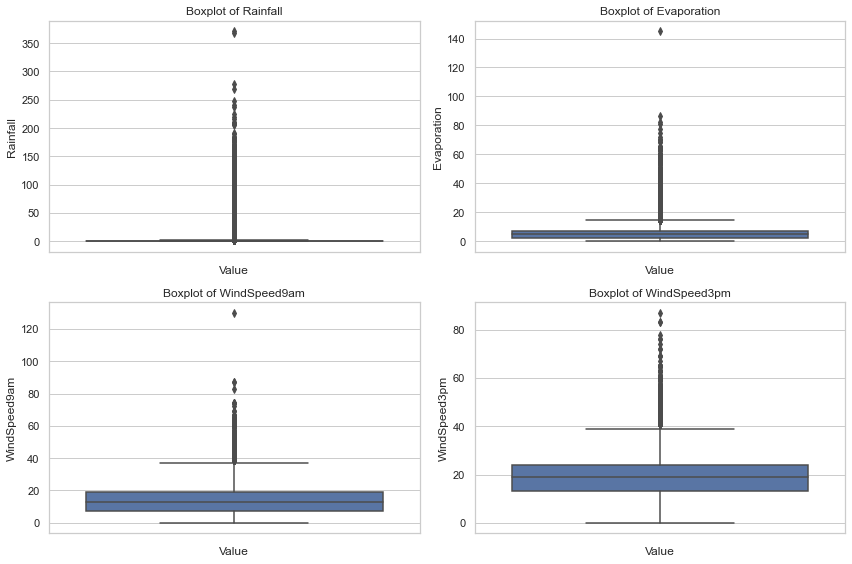

In [231]:
sns.set(style="whitegrid")

variables = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']

plt.figure(figsize=(12, 8))
for i, variable in enumerate(variables):
    plt.subplot(2, 2, i + 1)  
    sns.boxplot(y=df[variable])  
    plt.title(f'Boxplot of {variable}')
    plt.ylabel(variable) 
    plt.xlabel('Value') 

plt.tight_layout() 
plt.show()

The above boxplots confirm that there are lot of outliers in these variables.

### Check the distribution of variables


Now, I will plot the histograms to check distributions to find out if they are normal or skewed. If the variable follows normal distribution, then I will do `Extreme Value Analysis` otherwise if they are skewed, I will find IQR (Interquantile range).

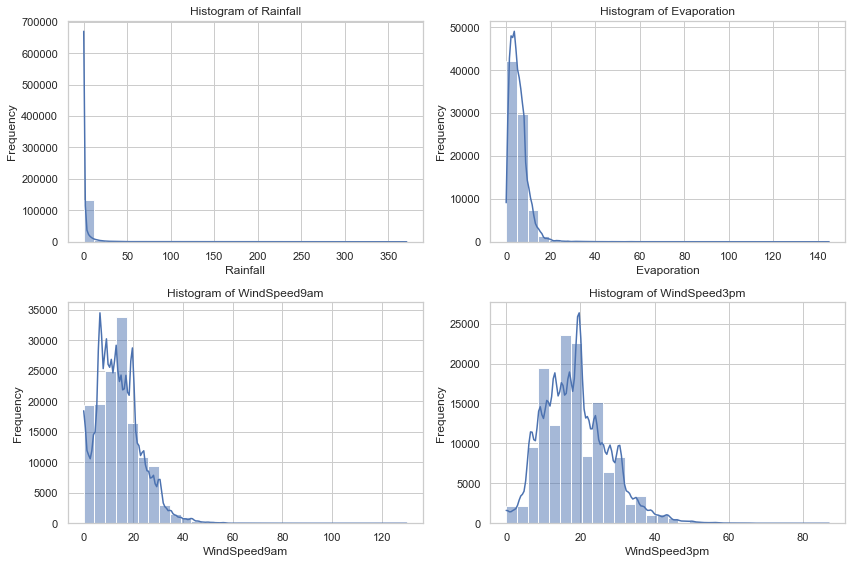

In [232]:
# plot histogram to check distribution
sns.set(style="whitegrid")

variables = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']

plt.figure(figsize=(12, 8))
for i, variable in enumerate(variables):
    plt.subplot(2, 2, i + 1)  
    sns.histplot(df[variable], kde=True, bins=30)  
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')

plt.tight_layout() 
plt.show()

We can see that all the four variables are skewed. So, I will use interquantile range to find outliers.

In [233]:
# find outliers for Rainfall variable

Q1 = df['Rainfall'].quantile(0.25)
Q3 = df['Rainfall'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Rainfall'] < lower_bound) | (df['Rainfall'] > upper_bound)]

print(f"Rainfall outliers are values < {lower_bound} or > {upper_bound}")
print(f"Number of outliers in Rainfall: {len(outliers)}")
print("Outliers in Rainfall variable:")
print(outliers[['Rainfall']])  


Rainfall outliers are values < -1.2000000000000002 or > 2.0
Number of outliers in Rainfall: 25228
Outliers in Rainfall variable:
        Rainfall
11           2.2
12          15.6
13           3.6
16          16.8
17          10.6
...          ...
142060       6.2
142125       6.8
142126      12.6
142127      34.6
142128       3.8

[25228 rows x 1 columns]


For `Rainfall`, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [234]:
# find outliers for Evaporation variable

Q1 = df['Evaporation'].quantile(0.25)
Q3 = df['Evaporation'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Evaporation'] < lower_bound) | (df['Evaporation'] > upper_bound)]

print(f"Evaporation outliers are values < {lower_bound} or > {upper_bound}")
print(f"Number of outliers in Evaporation: {len(outliers)}")
print("Outliers in Evaporation variable:")
print(outliers[['Evaporation']])

Evaporation outliers are values < -4.600000000000001 or > 14.600000000000001
Number of outliers in Evaporation: 1954
Outliers in Evaporation variable:
        Evaporation
5940           14.8
5952           14.8
5953           16.4
5954           17.4
5955           16.0
...             ...
140568         16.8
140571         31.0
140574         16.0
140576         17.0
140598         19.0

[1954 rows x 1 columns]


For `Evaporation`, the minimum and maximum values are 0.0 and 145.0. So, the outliers are values > 21.8.

In [235]:
# find outliers for WindSpeed9am variable

Q1 = df['WindSpeed9am'].quantile(0.25)
Q3 = df['WindSpeed9am'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['WindSpeed9am'] < lower_bound) | (df['WindSpeed9am'] > upper_bound)]

print(f"WindSpeed9am outliers are values < {lower_bound} or > {upper_bound}")
print(f"Number of outliers in WindSpeed9am: {len(outliers)}")
print("Outliers in WindSpeed9am variable:")
print(outliers[['WindSpeed9am']])

WindSpeed9am outliers are values < -11.0 or > 37.0
Number of outliers in WindSpeed9am: 1739
Outliers in WindSpeed9am variable:
        WindSpeed9am
3277            48.0
3627            39.0
4967            44.0
8973            39.0
9066            41.0
...              ...
137999          39.0
138213          39.0
138229          39.0
138565          39.0
140919          41.0

[1739 rows x 1 columns]


For `WindSpeed9am`, the minimum and maximum values are 0.0 and 130.0. So, the outliers are values > 55.0.

In [236]:
# find outliers for WindSpeed3pm variable

Q1 = df['WindSpeed3pm'].quantile(0.25)
Q3 = df['WindSpeed3pm'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['WindSpeed3pm'] < lower_bound) | (df['WindSpeed3pm'] > upper_bound)]

print(f"WindSpeed3pm outliers are values < {lower_bound} or > {upper_bound}")
print(f"Number of outliers in WindSpeed3pm: {len(outliers)}")
print("Outliers in WindSpeed3pm variable:")
print(outliers[['WindSpeed3pm']])

WindSpeed3pm outliers are values < -3.5 or > 40.5
Number of outliers in WindSpeed3pm: 2458
Outliers in WindSpeed3pm variable:
        WindSpeed3pm
51              48.0
354             46.0
379             50.0
1608            44.0
1673            46.0
...              ...
140884          43.0
141843          41.0
141924          48.0
141928          41.0
142013          43.0

[2458 rows x 1 columns]


For `WindSpeed3pm`, the minimum and maximum values are 0.0 and 87.0. So, the outliers are values > 57.0.

# **8. Declare feature vector and target variable** <a class="anchor" id="8"></a>



In [237]:
# drop RainTomorrow
# df = df.drop(columns=['RainTomorrow'])

print("Shape of the DataFrame after dropping RainTomorrow:", df.shape)


Shape of the DataFrame after dropping RainTomorrow: (142193, 29)


# **9. Split data into separate training and test set** <a class="anchor" id="9"></a>


In [238]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow', 'Date_year', 'Date_month',
       'Date_day', 'WindGustDir_Missing', 'WindDir9am_Missing',
       'WindDir3pm_Missing', 'RainToday_Missing'],
      dtype='object')

In [239]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [240]:
# check the shape of X_train and X_test
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (113754, 28)
X_test shape: (28439, 28)
y_train shape: (113754,)
y_test shape: (28439,)


# **10. Feature Engineering** <a class="anchor" id="10"></a>




**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. I will carry out feature engineering on different types of variables.



In [241]:
# check data types in X_train
data_types = X_train.dtypes

print("Data types in X_train:")
print(data_types)


Data types in X_train:
Location                object
MinTemp                float64
MaxTemp                float64
Rainfall               float64
Evaporation            float64
Sunshine               float64
WindGustDir             object
WindGustSpeed          float64
WindDir9am              object
WindDir3pm              object
WindSpeed9am           float64
WindSpeed3pm           float64
Humidity9am            float64
Humidity3pm            float64
Pressure9am            float64
Pressure3pm            float64
Cloud9am               float64
Cloud3pm               float64
Temp9am                float64
Temp3pm                float64
RainToday               object
Date_year                int64
Date_month               int64
Date_day                 int64
WindGustDir_Missing      int32
WindDir9am_Missing       int32
WindDir3pm_Missing       int32
RainToday_Missing         bool
dtype: object


In [242]:
# display categorical variables
categorical_vars = X_train.select_dtypes(include=['object', 'category']).columns

categorical_data = X_train[categorical_vars]

print("Categorical variables in X_train:")
categorical_data.head()


Categorical variables in X_train:


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
17969,NorahHead,SSW,NW,W,No
124769,Walpole,WSW,WNW,W,Yes
39287,Williamtown,ENE,W,E,No
127749,Hobart,WNW,WNW,WNW,No
40651,Williamtown,S,SW,SSE,No


In [243]:
# display numerical variables

numerical_vars = X_train.select_dtypes(include=['int64', 'float64']).columns

numerical_data = X_train[numerical_vars]
print("Numerical variables in X_train:")
numerical_data.head() 


Numerical variables in X_train:


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date_year,Date_month,Date_day
17969,15.1,23.9,0.0,NaN,NaN,67.0,19.0,22.0,38.0,68.0,1001.9,1002.4,NaN,NaN,19.8,14.3,2009,10,14
124769,9.7,14.2,7.6,NaN,NaN,50.0,15.0,28.0,91.0,56.0,1008.2,1007.7,NaN,NaN,11.1,13.4,2011,9,26
39287,13.2,25.4,0.0,3.2,8.8,30.0,6.0,17.0,79.0,63.0,1025.2,1021.5,6.0,5.0,21.2,24.0,2010,4,20
127749,7.6,14.8,0.0,4.0,7.0,94.0,30.0,35.0,52.0,45.0,1004.6,1001.4,NaN,NaN,11.1,12.9,2011,7,12
40651,12.9,22.2,0.0,4.0,7.9,37.0,15.0,20.0,69.0,52.0,1023.0,1021.2,6.0,2.0,18.8,20.6,2015,4,13


### Engineering missing values in numerical variables



In [244]:
# check missing values in numerical variables in X_train
missing_values_numerical = X_train.select_dtypes(include=['int64', 'float64']).isnull().sum()

print("Missing values in numerical variables in X_train:")
print(missing_values_numerical[missing_values_numerical > 0])


Missing values in numerical variables in X_train:
MinTemp            525
MaxTemp            268
Rainfall          1182
Evaporation      48791
Sunshine         54345
WindGustSpeed     7406
WindSpeed9am      1083
WindSpeed3pm      2109
Humidity9am       1420
Humidity3pm       2913
Pressure9am      11257
Pressure3pm      11225
Cloud9am         43041
Cloud3pm         45767
Temp9am            736
Temp3pm           2206
dtype: int64


In [245]:
# check missing values in numerical variables in X_test
missing_values_numerical_test = X_test.select_dtypes(include=['int64', 'float64']).isnull().sum()

print("Missing values in numerical variables in X_test:")
print(missing_values_numerical_test[missing_values_numerical_test > 0]) 


Missing values in numerical variables in X_test:
MinTemp            112
MaxTemp             54
Rainfall           224
Evaporation      12052
Sunshine         13471
WindGustSpeed     1864
WindSpeed9am       265
WindSpeed3pm       521
Humidity9am        354
Humidity3pm        697
Pressure9am       2757
Pressure3pm       2756
Cloud9am         10616
Cloud3pm         11327
Temp9am            168
Temp3pm            520
dtype: int64


In [246]:
# print percentage of missing values in the numerical variables in training set

missing_percentage_numerical = (X_train.select_dtypes(include=['int64', 'float64']).isnull().sum() / len(X_train)) * 100

print("Percentage of missing values in numerical variables in X_train:")
missing_percentage_numerical[missing_percentage_numerical > 0]

Percentage of missing values in numerical variables in X_train:


MinTemp           0.461522
MaxTemp           0.235596
Rainfall          1.039084
Evaporation      42.891679
Sunshine         47.774144
WindGustSpeed     6.510540
WindSpeed9am      0.952054
WindSpeed3pm      1.854001
Humidity9am       1.248308
Humidity3pm       2.560789
Pressure9am       9.895916
Pressure3pm       9.867785
Cloud9am         37.836911
Cloud3pm         40.233310
Temp9am           0.647010
Temp3pm           1.939272
dtype: float64

### Assumption


We assume that the data are missing completely at random (MCAR). There are two methods which can be used to impute missing values. One is mean or median imputation and other one is random sample imputation. When there are outliers in the dataset, we should use median imputation. So, I will use median imputation because median imputation is robust to outliers.

### explain how the train and test set should be imputed? why?
* should we extract the statistical measures to be used to fill missing values from the train set only? why?

به دلیل وجود داده‌های پرت در مجموعه، جایگزینی با میانه گزینه‌ای مناسب است زیرا میانه نسبت به مقادیر افراطی حساسیت کمتری دارد.
علت استفاده این است که محاسبه میانه برای مجموعه آزمایشی قبل از ارزیابی مدل ممکن است اطلاعاتی از مجموعه آزمایشی را به فرآیند آموزش مدل وارد کند و منجر به اورفیتینگ شود و با استفاده از آمارهای مربوط به مجموعه آموزشی، اطمینان حاصل می‌شود که فرآیند آموزش و تست هماهنگ هستند و  این روش کمک می‌کند تا مدل به داده‌های جدید و نادیده‌گرفته شده به خوبی تعمیم یابد.

In [247]:
# impute missing values in X_train and X_test with respective column median in X_train
     
medians = X_train.select_dtypes(include=['int64', 'float64']).median()

X_train.fillna(medians, inplace=True)

X_test.fillna(medians, inplace=True)
print("Missing values imputed in X_train and X_test with respective column median from X_train.")


Missing values imputed in X_train and X_test with respective column median from X_train.


In [248]:
# check again missing values in numerical variables in X_train
missing_values_numerical_after_imputation = X_train.select_dtypes(include=['int64', 'float64']).isnull().sum()

print("Missing values in numerical variables in X_train after imputation:")
missing_values_numerical_after_imputation[missing_values_numerical_after_imputation > 0]


Missing values in numerical variables in X_train after imputation:


Series([], dtype: int64)

In [249]:
# check missing values in numerical variables in X_test

missing_values_numerical_test_after_imputation = X_test.select_dtypes(include=['int64', 'float64']).isnull().sum()

print("Missing values in numerical variables in X_test after imputation:")
missing_values_numerical_test_after_imputation[missing_values_numerical_test_after_imputation > 0]



Missing values in numerical variables in X_test after imputation:


Series([], dtype: int64)

### Engineering missing values in categorical variables

In [250]:
# print percentage of missing values in the categorical variables in training set
missing_percentage_categorical = (X_train.select_dtypes(include=['object']).isnull().sum() / len(X_train)) * 100

print("Percentage of missing values in categorical variables in X_train:")
missing_percentage_categorical[missing_percentage_categorical > 0]

Percentage of missing values in categorical variables in X_train:


WindGustDir    6.556253
WindDir9am     7.064367
WindDir3pm     2.657489
RainToday      1.039084
dtype: float64

In [251]:
# print categorical variables with missing data

categorical_vars = X_train.select_dtypes(include=['object'])

missing_categorical = categorical_vars.isnull().sum()

categorical_with_missing = missing_categorical[missing_categorical > 0]

print("Categorical variables with missing data in X_train:")
print(categorical_with_missing)


Categorical variables with missing data in X_train:
WindGustDir    7458
WindDir9am     8036
WindDir3pm     3023
RainToday      1182
dtype: int64


In [252]:
# impute missing categorical variables with most frequent value
categorical_vars = X_train.select_dtypes(include=['object'])

for column in categorical_vars.columns:
    mode_value = categorical_vars[column].mode()[0]  
    X_train[column].fillna(mode_value, inplace=True)  
    
    X_test[column].fillna(mode_value, inplace=True)

print("Missing values in categorical variables imputed with the most frequent value.")

Missing values in categorical variables imputed with the most frequent value.


In [253]:
# check missing values in categorical variables in X_train

missing_values_categorical = X_train.select_dtypes(include=['object']).isnull().sum()

print("Missing values in categorical variables in X_train after imputation:")
missing_values_categorical[missing_values_categorical > 0]


Missing values in categorical variables in X_train after imputation:


Series([], dtype: int64)

In [254]:
# check missing values in categorical variables in X_test
missing_values_categorical_test = X_test.select_dtypes(include=['object']).isnull().sum()

print("Missing values in categorical variables in X_test after imputation:")
print(missing_values_categorical_test[missing_values_categorical_test > 0]) 


Missing values in categorical variables in X_test after imputation:
Series([], dtype: int64)


In [255]:
# check missing values in X_train
missing_values_train = X_train.isnull().sum()

print("Missing values in X_train:")
print(missing_values_train[missing_values_train > 0])


Missing values in X_train:
Series([], dtype: int64)


In [256]:
# check missing values in X_test
missing_values_test = X_test.isnull().sum()

print("Missing values in X_test:")
print(missing_values_test[missing_values_test > 0])

Missing values in X_test:
Series([], dtype: int64)


### Engineering outliers in numerical variables


We have seen that the `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns contain outliers

In [257]:
# use top-coding approach to cap maximum values and remove outliers from the above variables.
columns_to_cap = ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']

for column in columns_to_cap:
    cap_value = X_train[column].quantile(0.95)  
    
    X_train[column] = X_train[column].clip(upper=cap_value)
    X_test[column] = X_test[column].clip(upper=cap_value) 

print("Top-coding applied to cap maximum values for:", columns_to_cap)


Top-coding applied to cap maximum values for: ['Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm']


In [258]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(12.8, 12.8)

In [259]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(10.6, 10.6)

In [260]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(30.0, 30.0)

In [261]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(33.0, 33.0)

In [262]:
X_train[numerical_vars].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date_year,Date_month,Date_day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.00000,113754.000000,113754.000000,113754.000000
mean,12.175225,23.221349,1.497888,4.984851,7.993989,39.895063,13.714867,18.307831,68.839434,51.480317,1017.646309,1015.252305,4.647652,4.701452,16.981340,21.67070,2012.757802,6.400891,15.707826
std,6.384019,7.109859,3.371707,2.272440,2.758049,13.127684,8.129771,7.925198,18.944168,20.531492,6.750345,6.683925,2.292660,2.118964,6.470597,6.87257,2.541504,3.423346,8.797404
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,978.200000,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.70000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.30000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,12.800000,10.600000,14.500000,135.000000,30.000000,33.000000,100.000000,100.000000,1041.000000,1038.900000,8.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000


### Encode categorical variables

In [263]:
categorical

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [264]:
categorical_vars.head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
17969,NorahHead,SSW,NW,W,No
124769,Walpole,WSW,WNW,W,Yes
39287,Williamtown,ENE,W,E,No
127749,Hobart,WNW,WNW,WNW,No
40651,Williamtown,S,SW,SSE,No


In [266]:
# encode RainToday variable

# import category_encoders as ce

In [267]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp9am,Temp3pm,RainToday,Date_year,Date_month,Date_day,WindGustDir_Missing,WindDir9am_Missing,WindDir3pm_Missing,RainToday_Missing
17969,NorahHead,15.1,23.9,0.0,4.8,8.4,SSW,67.0,NW,W,...,19.8,14.3,No,2009,10,14,0,0,0,False
124769,Walpole,9.7,14.2,7.6,4.8,8.4,WSW,50.0,WNW,W,...,11.1,13.4,Yes,2011,9,26,0,0,0,False
39287,Williamtown,13.2,25.4,0.0,3.2,8.8,ENE,30.0,W,E,...,21.2,24.0,No,2010,4,20,0,0,0,False
127749,Hobart,7.6,14.8,0.0,4.0,7.0,WNW,94.0,WNW,WNW,...,11.1,12.9,No,2011,7,12,0,0,0,False
40651,Williamtown,12.9,22.2,0.0,4.0,7.9,S,37.0,SW,SSE,...,18.8,20.6,No,2015,4,13,0,0,0,False


In [268]:
# Combine numerical features and one-hot encoded categorical features (Location, WindGustDir, WindDir9am, WindDir3pm, and RainToday) into X_train
numerical_features = X_train.select_dtypes(include=['float64', 'int64'])  # Adjust based on your numerical types

X_train_combined = pd.concat([numerical_features, X_train], axis=1)

print("Combined X_train:")
print(X_train_combined.head())

Combined X_train:
        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
17969      15.1     23.9       0.0          4.8       8.4           67.0   
124769      9.7     14.2       7.6          4.8       8.4           50.0   
39287      13.2     25.4       0.0          3.2       8.8           30.0   
127749      7.6     14.8       0.0          4.0       7.0           94.0   
40651      12.9     22.2       0.0          4.0       7.9           37.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Temp9am  \
17969           19.0          22.0         38.0         68.0  ...     19.8   
124769          15.0          28.0         91.0         56.0  ...     11.1   
39287            6.0          17.0         79.0         63.0  ...     21.2   
127749          30.0          33.0         52.0         45.0  ...     11.1   
40651           15.0          20.0         69.0         52.0  ...     18.8   

        Temp3pm  RainToday  Date_year  Date_month  Date_

In [269]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp9am,Temp3pm,RainToday,Date_year,Date_month,Date_day,WindGustDir_Missing,WindDir9am_Missing,WindDir3pm_Missing,RainToday_Missing
17969,NorahHead,15.1,23.9,0.0,4.8,8.4,SSW,67.0,NW,W,...,19.8,14.3,No,2009,10,14,0,0,0,False
124769,Walpole,9.7,14.2,7.6,4.8,8.4,WSW,50.0,WNW,W,...,11.1,13.4,Yes,2011,9,26,0,0,0,False
39287,Williamtown,13.2,25.4,0.0,3.2,8.8,ENE,30.0,W,E,...,21.2,24.0,No,2010,4,20,0,0,0,False
127749,Hobart,7.6,14.8,0.0,4.0,7.0,WNW,94.0,WNW,WNW,...,11.1,12.9,No,2011,7,12,0,0,0,False
40651,Williamtown,12.9,22.2,0.0,4.0,7.9,S,37.0,SW,SSE,...,18.8,20.6,No,2015,4,13,0,0,0,False


In [270]:
# Combine numerical features and one-hot encoded categorical features (Location, WindGustDir, WindDir9am, WindDir3pm, and RainToday) into X_test
numerical_features_test = X_test.select_dtypes(include=['float64', 'int64']) 

X_test_combined = pd.concat([numerical_features_test, X_test], axis=1)

print("Combined X_test:")
print(X_test_combined.head())

Combined X_test:
        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
56320       7.1     13.0       8.8          4.8       8.4           41.0   
124136     13.2     18.3       0.0          4.8       8.4           48.0   
117063      9.2     22.7       0.0          5.0      11.1           52.0   
6974       15.3     26.1       0.0         10.4       8.4           44.0   
61546      11.9     31.8       0.0          5.0       4.1           72.0   

        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  ...  Temp9am  \
56320           24.0          22.0        100.0         98.0  ...      8.6   
124136          24.0          20.0         73.0         73.0  ...     14.2   
117063          26.0          20.0         45.0         25.0  ...     15.1   
6974            24.0          19.0         48.0         40.0  ...     17.5   
61546            6.0          19.0         89.0         25.0  ...     16.2   

        Temp3pm  RainToday  Date_year  Date_month  Date_d

In [271]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Temp9am,Temp3pm,RainToday,Date_year,Date_month,Date_day,WindGustDir_Missing,WindDir9am_Missing,WindDir3pm_Missing,RainToday_Missing
56320,Ballarat,7.1,13.0,8.8,4.8,8.4,N,41.0,N,WNW,...,8.6,11.5,Yes,2016,6,9,0,0,0,False
124136,Walpole,13.2,18.3,0.0,4.8,8.4,E,48.0,ESE,ESE,...,14.2,17.0,No,2009,10,24,0,0,0,False
117063,PerthAirport,9.2,22.7,0.0,5.0,11.1,ENE,52.0,ENE,ESE,...,15.1,22.5,No,2015,9,21,0,0,0,False
6974,Cobar,15.3,26.1,0.0,10.4,8.4,E,44.0,E,NE,...,17.5,24.3,No,2011,12,6,0,0,0,False
61546,Sale,11.9,31.8,0.0,5.0,4.1,NW,72.0,E,N,...,16.2,27.4,No,2014,3,15,0,0,0,False


# **11. Feature Scaling** <a class="anchor" id="11"></a>



In [272]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date_year,Date_month,Date_day,WindGustDir_Missing,WindDir9am_Missing,WindDir3pm_Missing
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.175225,23.221349,1.497888,4.984851,7.993989,39.895063,13.714867,18.307831,68.839434,51.480317,...,4.647652,4.701452,16.981340,21.67070,2012.757802,6.400891,15.707826,0.065563,0.070644,0.026575
std,6.384019,7.109859,3.371707,2.272440,2.758049,13.127684,8.129771,7.925198,18.944168,20.531492,...,2.292660,2.118964,6.470597,6.87257,2.541504,3.423346,8.797404,0.247517,0.256230,0.160838
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,3.000000,4.000000,12.300000,16.70000,2011.000000,3.000000,8.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,6.000000,6.000000,21.500000,26.30000,2015.000000,9.000000,23.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,12.800000,10.600000,14.500000,135.000000,30.000000,33.000000,100.000000,100.000000,...,8.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000


In [273]:
cols = X_train.columns

In [274]:
y_test_combined = pd.concat([numerical_features_test, y_test], axis=1)
y_train_combined = pd.concat([numerical_features_test, y_train], axis=1)

In [275]:
print("X_train shape:", X_train_combined.shape)
print("X_test shape:", X_test_combined.shape)
print("y_train shape:", y_train_combined.shape)
print("y_test shape:", y_test_combined.shape)

X_train shape: (113754, 47)
X_test shape: (28439, 47)
y_train shape: (142193, 20)
y_test shape: (28439, 20)


In [277]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train[numerical_columns])

X_test_scaled = scaler.transform(X_test[numerical_columns])

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_columns, index=X_test.index)

X_train_combined = pd.concat([X_train_scaled_df, X_train.drop(columns=numerical_columns)], axis=1)

X_test_combined = pd.concat([X_test_scaled_df, X_test.drop(columns=numerical_columns)], axis=1)

print("Final X_train_combined shape:", X_train_combined.shape)
print("Final X_test_combined shape:", X_test_combined.shape)


Final X_train_combined shape: (113754, 28)
Final X_test_combined shape: (28439, 28)


In [278]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Date_year,Date_month,Date_day,WindGustDir_Missing,WindDir9am_Missing,WindDir3pm_Missing
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,...,113754.000000,113754.000000,113754.000000,113754.00000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.175225,23.221349,1.497888,4.984851,7.993989,39.895063,13.714867,18.307831,68.839434,51.480317,...,4.647652,4.701452,16.981340,21.67070,2012.757802,6.400891,15.707826,0.065563,0.070644,0.026575
std,6.384019,7.109859,3.371707,2.272440,2.758049,13.127684,8.129771,7.925198,18.944168,20.531492,...,2.292660,2.118964,6.470597,6.87257,2.541504,3.423346,8.797404,0.247517,0.256230,0.160838
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-7.200000,-5.40000,2007.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,3.000000,4.000000,12.300000,16.70000,2011.000000,3.000000,8.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,5.000000,5.000000,16.700000,21.10000,2013.000000,6.000000,16.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,...,6.000000,6.000000,21.500000,26.30000,2015.000000,9.000000,23.000000,0.000000,0.000000,0.000000
max,33.900000,48.100000,12.800000,10.600000,14.500000,135.000000,30.000000,33.000000,100.000000,100.000000,...,8.000000,9.000000,40.200000,46.70000,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000


# **12. Model training** <a class="anchor" id="12"></a>



In [279]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(X_train_combined.dtypes)

non_numeric_columns = X_train_combined.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)

X_train_encoded = pd.get_dummies(X_train_combined, columns=non_numeric_columns, drop_first=True)

X_test_encoded = pd.get_dummies(X_test_combined, columns=non_numeric_columns, drop_first=True)

X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)

model = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000)
model.fit(X_train_encoded, y_train)

y_train_pred = model.predict(X_train_encoded)

y_test_pred = model.predict(X_test_encoded)

print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred))

print("Classification Report:\n", classification_report(y_test, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


MinTemp                float64
MaxTemp                float64
Rainfall               float64
Evaporation            float64
Sunshine               float64
WindGustSpeed          float64
WindSpeed9am           float64
WindSpeed3pm           float64
Humidity9am            float64
Humidity3pm            float64
Pressure9am            float64
Pressure3pm            float64
Cloud9am               float64
Cloud3pm               float64
Temp9am                float64
Temp3pm                float64
Date_year              float64
Date_month             float64
Date_day               float64
Location                object
WindGustDir             object
WindDir9am              object
WindDir3pm              object
RainToday               object
WindGustDir_Missing      int32
WindDir9am_Missing       int32
WindDir3pm_Missing       int32
RainToday_Missing         bool
dtype: object
Non-numeric columns: Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')
Train

# **13. Predict results** <a class="anchor" id="13"></a>



In [280]:
# predit y_pred with trained model
y_test_pred_list = y_test_pred.tolist()
print("Predicted values as a list:", y_test_pred_list)


Predicted values as a list: ['Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 

### predict_proba method


In [281]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['Location', 'RainToday', 'WindDir3pm', 'WindDir9am', 'WindGustDir']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough' 
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(random_state=0, solver='liblinear'))
])

pipeline.fit(X_train_combined, y_train)

y_test_pred = pipeline.predict(X_test_combined)
probabilities = pipeline.predict_proba(X_test_combined)[:, 0] 

print(probabilities)


[0.14405211 0.70873298 0.98378603 ... 0.98563209 0.95023486 0.95600308]


In [282]:
# probability of getting output as 1 - rain
probabilities = pipeline.predict_proba(X_test_combined)

probability_of_rain = probabilities[:, 1]

print(probability_of_rain)


[0.85594789 0.29126702 0.01621397 ... 0.01436791 0.04976514 0.04399692]


# **14. Check accuracy score** <a class="anchor" id="14"></a>



In [283]:
# print testset accuracy
from sklearn.metrics import accuracy_score

print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred))


Test Set Accuracy: 0.8471816871198002


In [284]:
# print trainset accuracy
print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred))

Training Set Accuracy: 0.8492888162174517


### Compare the train-set and test-set accuracy and check for overfitting? explain if the model suffers from overfitting?

بیش‌برازش زمانی رخ می‌دهد که مدل بر روی داده‌های آموزش عملکرد خوبی داشته باشد، اما بر روی داده‌های تست ضعیف عمل کند.
اما درصد ها نزدیک است.

### Check for overfitting and underfitting

In [285]:
# print the scores on training and test set

print("Training Set Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred))

Training Set Accuracy: 0.8492888162174517
Test Set Accuracy: 0.8471816871198002


In [107]:
# fit the Logsitic Regression model with C=100


LogisticRegression(C=100, random_state=0, solver='liblinear')

In [108]:
# print the scores on training and test set


Training set score: 0.8478
Test set score: 0.8505


### explain if the performance of the model has improved? why?

In [368]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.impute import SimpleImputer

df = pd.read_csv('./data/weatherAUS.csv')  
df['RainToday'] = df['Rainfall'].apply(lambda x: 1 if x > 0 else 0)

X = df[['MaxTemp', 'MinTemp', 'Rainfall']] 
y = df['RainToday']

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

model = LogisticRegression(C=0.01, max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.9041808783712507

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     18323
           1       0.97      0.75      0.85     10116

    accuracy                           0.90     28439
   macro avg       0.92      0.87      0.89     28439
weighted avg       0.91      0.90      0.90     28439



In [369]:

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("\nClassification Report for Test Set:\n", classification_report(y_test, y_test_pred))

Training Accuracy: 0.9033880127292228
Test Accuracy: 0.9041808783712507

Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     18323
           1       0.97      0.75      0.85     10116

    accuracy                           0.90     28439
   macro avg       0.92      0.87      0.89     28439
weighted avg       0.91      0.90      0.90     28439



In [286]:
# # fit the Logsitic Regression model with C=001
# from sklearn.linear_model import LogisticRegression

# categorical_features = ['Location', 'RainToday', 'WindDir3pm', 'WindDir9am', 'WindGustDir']

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(), categorical_features)
#     ],
#     remainder='passthrough' 
# )

# X_train_transformed = preprocessor.fit_transform(X_train)

# X_test_transformed = preprocessor.transform(X_test)

# model = LogisticRegression(C=100, random_state=0, solver='liblinear')
# model.fit(X_train_transformed, y_train)


LogisticRegression(C=100, random_state=0, solver='liblinear')

In [287]:
# # print the scores on training and test set

# y_train_pred = model.predict(X_train_transformed)
# y_test_pred = model.predict(X_test_transformed)

# train_accuracy = accuracy_score(y_train, y_train_pred)
# test_accuracy = accuracy_score(y_test, y_test_pred)

# print("Training Set Accuracy: {:.2f}%".format(train_accuracy * 100))
# print("Test Set Accuracy: {:.2f}%".format(test_accuracy * 100))

Training Set Accuracy: 84.68%
Test Set Accuracy: 84.40%


### explain if the performance of the model has improved? why?

### Compare model accuracy with null accuracy

In [371]:
# check class distribution in test set

class_distribution = y_test.value_counts()

print(class_distribution)

0    18323
1    10116
Name: RainToday, dtype: int64


In [372]:
# check null accuracy score

class_distribution = y_test.value_counts()

null_accuracy = class_distribution.max() / class_distribution.sum()

print("Null Accuracy Score:", null_accuracy)


Null Accuracy Score: 0.6442912901297514


### conclude the result

# **15. Confusion matrix** <a class="anchor" id="15"></a>



A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



In [373]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)

print("Confusion Matrix:\n", cm)

TN = cm[0, 0]  
FP = cm[0, 1]  
FN = cm[1, 0]  
TP = cm[1, 1] 

print("\nTrue Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)

Confusion Matrix:
 [[18095   228]
 [ 2497  7619]]

True Positives (TP): 7619
True Negatives (TN): 18095
False Positives (FP): 228
False Negatives (FN): 2497


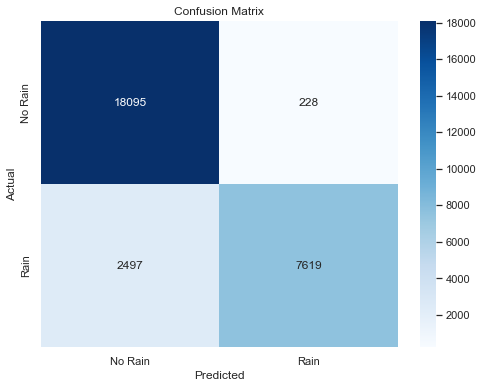

In [374]:
# visualize confusion matrix with seaborn heatmap

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Rain', 'Rain'], 
            yticklabels=['No Rain', 'Rain'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# **16. Classification metrices** <a class="anchor" id="16"></a>



## Classification Report


**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.


In [375]:
# print classification report
from sklearn.metrics import classification_report
report = classification_report(y_test, y_test_pred, target_names=['No Rain', 'Rain'])
print(report)

              precision    recall  f1-score   support

     No Rain       0.88      0.99      0.93     18323
        Rain       0.97      0.75      0.85     10116

    accuracy                           0.90     28439
   macro avg       0.92      0.87      0.89     28439
weighted avg       0.91      0.90      0.90     28439



## Classification accuracy

In [376]:
# print classification accuracy
accuracy = accuracy_score(y_test, y_test_pred)

print(f'Classification Accuracy: {accuracy:.4f}')


Classification Accuracy: 0.9042


## Classification error

In [377]:
# print classification error

print(f'Classification Error: {1 - accuracy:.4f}')

Classification Error: 0.0958


## Precision


**Precision** can be defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of true positives (TP) to the sum of true and false positives (TP + FP). 


So, **Precision** identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.



Mathematically, precision can be defined as the ratio of `TP to (TP + FP).`




In [379]:
# print precision score
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_test_pred)

print("Precision Score:", precision)

Precision Score: 0.9709443099273608


## Recall


Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes.
It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). **Recall** is also called **Sensitivity**.


**Recall** identifies the proportion of correctly predicted actual positives.


Mathematically, recall can be given as the ratio of `TP to (TP + FN).`





In [381]:
# print recall score
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_test_pred)

# Print the recall score
print("Recall Score:", recall)

Recall Score: 0.7531633056544088


## True Positive Rate


**True Positive Rate** is synonymous with **Recall**.


In [382]:
# print true positive rate
from sklearn.metrics import confusion_matrix

true_positive_rate = recall_score(y_test, y_test_pred)

print("True Positive Rate:", true_positive_rate)


True Positive Rate (Recall): 0.7531633056544088


## False Positive Rate

In [383]:
# print false positive rate
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

false_positive_rate = fp / (fp + tn)

print("False Positive Rate:", false_positive_rate)

False Positive Rate: 0.012443377176226601


## Specificity

In [384]:
# print specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

specificity = tn / (tn + fp)

print("Specificity (True Negative Rate):", specificity)

Specificity (True Negative Rate): 0.9875566228237734


# **17. Adjusting the threshold level** <a class="anchor" id="17"></a>




In [301]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [385]:
# print the first 10 predicted probabilities of two classes- 0 and 1

predicted_probabilities = model.predict_proba(X_test)

print("Predicted probabilities for the first 10 instances:")
for i in range(10):
    print(f"Instance {i+1}: Class 0 Probability: {predicted_probabilities[i][0]:.4f}, Class 1 Probability: {predicted_probabilities[i][1]:.4f}")


Predicted probabilities for the first 10 instances:
Instance 1: Class 0 Probability: 0.0000, Class 1 Probability: 1.0000
Instance 2: Class 0 Probability: 0.7792, Class 1 Probability: 0.2208
Instance 3: Class 0 Probability: 0.9064, Class 1 Probability: 0.0936
Instance 4: Class 0 Probability: 0.9045, Class 1 Probability: 0.0955
Instance 5: Class 0 Probability: 0.9677, Class 1 Probability: 0.0323
Instance 6: Class 0 Probability: 0.9097, Class 1 Probability: 0.0903
Instance 7: Class 0 Probability: 0.9613, Class 1 Probability: 0.0387
Instance 8: Class 0 Probability: 0.0002, Class 1 Probability: 0.9998
Instance 9: Class 0 Probability: 0.9677, Class 1 Probability: 0.0323
Instance 10: Class 0 Probability: 0.9474, Class 1 Probability: 0.0526


In [386]:

predicted_probabilities = model.predict_proba(X_test)

probabilities_df = pd.DataFrame(predicted_probabilities, columns=['Class_0_Probability', 'Class_1_Probability'])

probabilities_df['True_Label'] = y_test.reset_index(drop=True)

probabilities_df.head(10)


,Class_0_Probability,Class_1_Probability,True_Label
0,1.834088e-13,1.000000,1
1,7.792039e-01,0.220796,0
2,9.064456e-01,0.093554,0
3,9.044595e-01,0.095540,0
4,9.677152e-01,0.032285,0
5,9.097329e-01,0.090267,0
6,9.612785e-01,0.038721,0
7,1.967614e-04,0.999803,1
8,9.677152e-01,0.032285,0
9,9.473917e-01,0.052608,0


In [387]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

print("First 10 predicted probabilities for class 1 (Probability of rain):")
print(probabilities_df['Class_1_Probability'].head(10))

First 10 predicted probabilities for class 1 (Probability of rain):
0    1.000000
1    0.220796
2    0.093554
3    0.095540
4    0.032285
5    0.090267
6    0.038721
7    0.999803
8    0.032285
9    0.052608
Name: Class_1_Probability, dtype: float64


In [389]:
# store the predicted probabilities for class 1 - Probability of rain
predicted_probabilities = model.predict_proba(X_test)

probabilities_df = pd.DataFrame(predicted_probabilities, columns=['Class_0_Probability', 'Class_1_Probability'])

probability_of_rain = probabilities_df['Class_1_Probability']

probabilities_df['True_Label'] = y_test.reset_index(drop=True)

print("First few rows of the probabilities DataFrame:")
print(probabilities_df.head())

print("\nPredicted probabilities for class 1 (Probability of rain):")
probability_of_rain.head(10)


First few rows of the probabilities DataFrame:
   Class_0_Probability  Class_1_Probability  True_Label
0         1.834088e-13             1.000000           1
1         7.792039e-01             0.220796           0
2         9.064456e-01             0.093554           0
3         9.044595e-01             0.095540           0
4         9.677152e-01             0.032285           0

Predicted probabilities for class 1 (Probability of rain):


0    1.000000
1    0.220796
2    0.093554
3    0.095540
4    0.032285
5    0.090267
6    0.038721
7    0.999803
8    0.032285
9    0.052608
Name: Class_1_Probability, dtype: float64

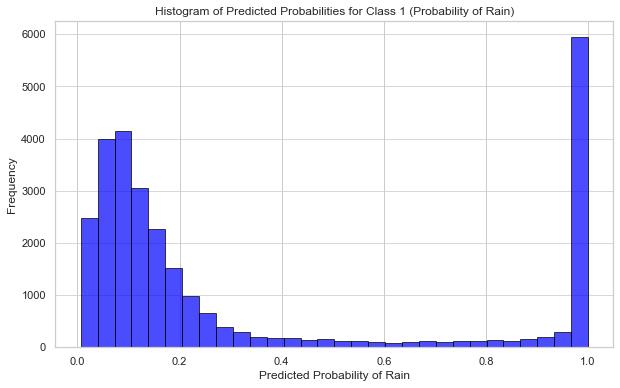

In [391]:

probability_of_rain = probabilities_df['Class_1_Probability']

plt.figure(figsize=(10, 6))
plt.hist(probability_of_rain, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.title('Histogram of Predicted Probabilities for Class 1 (Probability of Rain)')
plt.xlabel('Predicted Probability of Rain')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


Text(0, 0.5, 'Frequency')

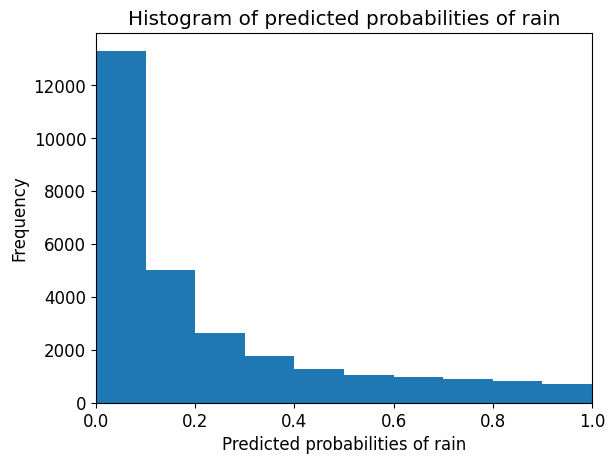

In [128]:
# plot histogram of predicted probabilities



### Lower the threshold

In [394]:
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Assuming you have the predicted probabilities for class 1 in probability_of_rain
thresholds = np.arange(0.1, 1.0, 0.1)  # Example thresholds from 0.1 to 0.9

# Loop over each threshold and evaluate the model
for threshold in thresholds:
    # Generate predictions based on the threshold
    predictions = (probability_of_rain >= threshold).astype(int)
    
    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    
    # Calculate performance metrics
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    
    # Print the results
    print(f"Threshold: {threshold:.1f}")
    print(f"Confusion Matrix:\n[[TN: {tn}, FP: {fp}],\n [FN: {fn}, TP: {tp}]]")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}\n")


Threshold: 0.1
Confusion Matrix:
[[TN: 7729, FP: 14338],
 [FN: 2245, TP: 4127]]
Precision: 0.22, Recall: 0.65, F1 Score: 0.33

Threshold: 0.2
Confusion Matrix:
[[TN: 13392, FP: 8675],
 [FN: 3869, TP: 2503]]
Precision: 0.22, Recall: 0.39, F1 Score: 0.29

Threshold: 0.3
Confusion Matrix:
[[TN: 15049, FP: 7018],
 [FN: 4393, TP: 1979]]
Precision: 0.22, Recall: 0.31, F1 Score: 0.26

Threshold: 0.4
Confusion Matrix:
[[TN: 15559, FP: 6508],
 [FN: 4550, TP: 1822]]
Precision: 0.22, Recall: 0.29, F1 Score: 0.25

Threshold: 0.5
Confusion Matrix:
[[TN: 15947, FP: 6120],
 [FN: 4645, TP: 1727]]
Precision: 0.22, Recall: 0.27, F1 Score: 0.24

Threshold: 0.6
Confusion Matrix:
[[TN: 16216, FP: 5851],
 [FN: 4725, TP: 1647]]
Precision: 0.22, Recall: 0.26, F1 Score: 0.24

Threshold: 0.7
Confusion Matrix:
[[TN: 16466, FP: 5601],
 [FN: 4789, TP: 1583]]
Precision: 0.22, Recall: 0.25, F1 Score: 0.23

Threshold: 0.8
Confusion Matrix:
[[TN: 16716, FP: 5351],
 [FN: 4864, TP: 1508]]
Precision: 0.22, Recall: 0.24, 

In [395]:
# # Evaluate model at different thresholds and print confusion matrix with performance metrics

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import LabelEncoder

# data = pd.read_csv('./data/weatherAUS.csv')

# if 'Date' in data.columns:
#     data['Year'] = pd.to_datetime(data['Date']).dt.year
#     data['Month'] = pd.to_datetime(data['Date']).dt.month
#     data['Day'] = pd.to_datetime(data['Date']).dt.day
#     data = data.drop('Date', axis=1)
    
# categorical_features = ['Location', 'RainToday', 'WindDir3pm', 'WindDir9am', 'WindGustDir']  
# encoder = OneHotEncoder(sparse=False, drop='first')  

# encoded_features = encoder.fit_transform(data[categorical_features])
# encoded_feature_names = encoder.get_feature_names_out(categorical_features)

# encoded_df = pd.DataFrame(encoded_features, columns=encoded_feature_names)

# data = data.drop(categorical_features, axis=1).reset_index(drop=True)
# data = pd.concat([data, encoded_df], axis=1)

# X = data.drop('RainTomorrow', axis=1)
# y = data['RainTomorrow']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# imputer = SimpleImputer(strategy='mean')
# X_train = imputer.fit_transform(X_train)
# X_test = imputer.transform(X_test)

# le = LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.transform(y_test)

# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(C=100, random_state=0, solver='liblinear')
# model.fit(X_train, y_train)

# y_pred_proba = model.predict_proba(X_test)[:, 1]

# thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# for threshold in thresholds:
#     y_pred = binarize(y_pred_proba.reshape(-1, 1), threshold=threshold).ravel()
    
#     cm = confusion_matrix(y_test, y_pred)
#     accuracy = accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
    
#     print(f"Threshold: {threshold}")
#     print("Confusion Matrix:")
#     print(cm)
#     print(f"Accuracy: {accuracy:.4f}")
#     print(f"Precision: {precision:.4f}")
#     print(f"Recall: {recall:.4f}")
#     print(f"F1 Score: {f1:.4f}")
#     print("-" * 30)

# **18. ROC - AUC** <a class="anchor" id="18"></a>






## ROC Curve




In [396]:
# # plot ROC Curve

# from sklearn.metrics import roc_curve, roc_auc_score
# import matplotlib.pyplot as plt

# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# roc_auc = roc_auc_score(y_test, y_pred_proba)

# plt.figure(figsize=(8, 6))
# plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
# plt.plot([0, 1], [0, 1], color='red', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc='lower right')
# plt.grid()
# plt.show()




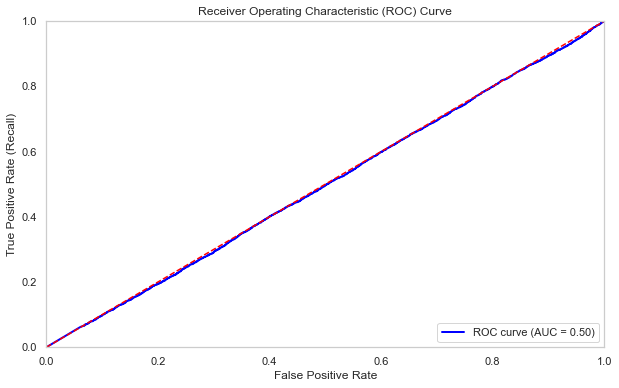

In [398]:
from sklearn.metrics import roc_curve, roc_auc_score

probability_of_rain = probabilities_df['Class_1_Probability']

fpr, tpr, thresholds = roc_curve(y_test, probability_of_rain)

roc_auc = roc_auc_score(y_test, probability_of_rain)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


## ROC-AUC



In [400]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, probability_of_rain)

print(f"ROC AUC Score: {roc_auc:.2f}")


ROC AUC Score: 0.50


In [402]:
# calculate cross-validated ROC AUC 

from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, roc_auc_score

imputer = SimpleImputer(strategy='mean')

model = make_pipeline(imputer, LogisticRegression())

roc_auc_scorer = make_scorer(roc_auc_score, needs_proba=True)

cv_scores = cross_val_score(model, X, y, cv=5, scoring=roc_auc_scorer)

print("Cross-validated ROC AUC scores for each fold:", cv_scores)
print(f"Mean cross-validated ROC AUC score: {cv_scores.mean():.2f}")



Cross-validated ROC AUC scores for each fold: [0.99925369 0.99940328 0.99794816 0.99664745 0.99822867]
Mean cross-validated ROC AUC score: 1.00


# **19. k-Fold Cross Validation** <a class="anchor" id="19"></a>




In [135]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score



Cross-validation scores:[0.84686387 0.84624852 0.84633642 0.84963298 0.84773626]


In [136]:
# compute Average cross-validation score

print(f"Mean cross-validated ROC AUC score: {cv_scores.mean():.2f}")

Average cross-validation score: 0.8474


# **20. Hyperparameter Optimization using GridSearch CV** <a class="anchor" id="20"></a>



In [137]:
from sklearn.model_selection import GridSearchCV




GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [403]:
# Examine the best model by printing the best score, parameters, and chosen estimator from GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],  
    'logisticregression__solver': ['liblinear', 'lbfgs'],  
}

pipeline = make_pipeline(SimpleImputer(strategy='mean'), LogisticRegression())

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

grid_search.fit(X, y)

print(f"Best ROC AUC Score: {grid_search.best_score_:.2f}")
print("Best Parameters:", grid_search.best_params_)
print("Best Estimator:", grid_search.best_estimator_)


Best ROC AUC Score: 1.00
Best Parameters: {'logisticregression__C': 1, 'logisticregression__solver': 'liblinear'}
Best Estimator: Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('logisticregression',
                 LogisticRegression(C=1, solver='liblinear'))])


In [139]:
# calculate GridSearch CV score on test set



GridSearch CV score on test set: 0.8507


# **21. EDA** 

In [334]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [352]:
df = pd.read_csv("./data/train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [353]:
# calculate statistic explain
desc_stats = df.describe()  
print("Descriptive Statistics:")
desc_stats

Descriptive Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA on categorical data

Unique values in 'sex' column: ['male' 'female']

Frequency of each value in 'sex' column:
 male      577
female    314
Name: Sex, dtype: int64


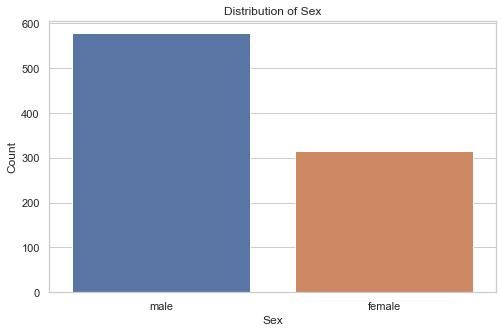

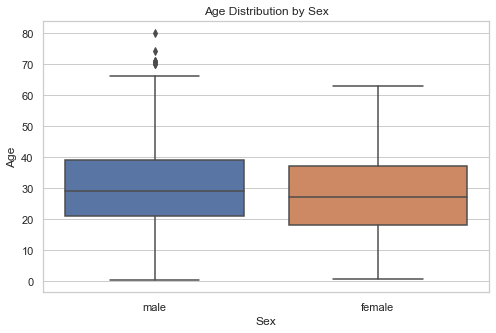

In [354]:
# on Sex column

unique_sex = df['Sex'].unique()
print("Unique values in 'sex' column:", unique_sex)

sex_counts = df['Sex'].value_counts()
print("\nFrequency of each value in 'sex' column:\n", sex_counts)

plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Sex', y='Age', data=df)  
plt.title('Age Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

## EDA with Numeric Variables


Missing values in 'Fare' column: 0


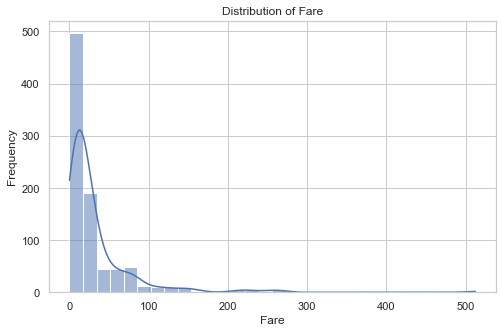

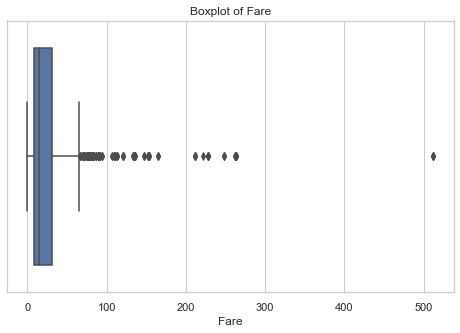

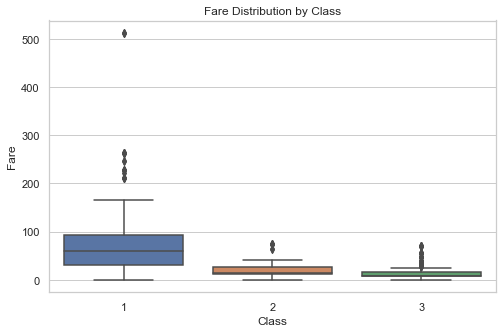

In [355]:
# on Fare column

missing_fare = df['Fare'].isnull().sum()
print("\nMissing values in 'Fare' column:", missing_fare)

plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=30, kde=True)  
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df['Fare'])
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=df)  
plt.title('Fare Distribution by Class')
plt.xlabel('Class')
plt.ylabel('Fare')
plt.show()

## feature selection please select 5 feature that maximum Information Gain  

## train model that fit on data and describe why selected method? your nodel is (KNN , regression , logistic regression)

In [356]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [341]:
# drop Survived from df Survived is predictable value
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [357]:
data_train = df.iloc[0:891]  
data_test = df.iloc[891:]  

print("Training set shape:", data_train.shape)
print("Test set shape:", data_test.shape)

Training set shape: (891, 12)
Test set shape: (0, 12)


In [360]:

df['Age'].fillna(df['Age'].median(), inplace=True)

df['Fare'].fillna(df['Fare'].median(), inplace=True)

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex']) 

df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

X = df.drop(columns=['Survived'])  
y = df['Survived']                  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)


Training set shape: (712, 8) (712,)
Test set shape: (179, 8) (179,)


## Additional score:
Offer a model that is better than the previous model, it doesn't have to be the previous model

In [361]:
model = LogisticRegression(max_iter=200) 
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.8100558659217877

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

